# MLIAP and Data Efficiency

In this section we will showcase data efficiency of equivariant neural networks by carrying out a case study of implementing Machine-Learning interatomic potentials (MLIAPs) that are often used to carry out large-scale molecular dynamic simulations in the field of computational material science.  Interatomic potentials (IAPs) are a group of functions $f: \mathcal{R}^{n_{nbi} \times m_{in}} \to \mathcal{R}^{m_{out}}$ that maps the local information tensor of neighboring atoms in the vicinity of the center atom to a vector of $\mathcal{R}^{m_{out}}$ that contains the potential energy and forces of the center atom.

A critical bottleneck of the current field resides not only in the expressiveness of such MLIAPs, but also in the computational cost of generating accurate training and testing datasets using first-principle calculations such as Density-Functional Theory(DFT). The input representations used by status-quo MLIAPs are usually invariant to symmetries and translations of the local environment[1] which are shown to be very data-craving. As described in some prior works[2], MLIAPs with equivariant features have been proven to be more data-efficient than non-equivariant potentials thanks to its features and architectures.

In this case study, we will make a direct comparison between en equivariant machine learning inter-atomic potential (Nequip)[2]  and a non-equivariant simple feed-forward Moment Tensor Potentials (MTP)[1]. The complete training dataset consists of $\sim 1250$ structures of a 3-component alloy system obtained from DFT simulations, and we varied the training dataset size from $10\%$ to $100\%$ of the complete training dataset, each time increasing the fraciton by $10\%$.

In addition to dataset sizes, we also controlled the number of training epochs for each dataset size such that all potentials are trained using the same amount of computation resources (1 GPU-hour $\sim$ 10 CPU-hours). We then compared the mean absolute error (MAE) of predicted energies from both potentials and plotted the errors against the dataset size:

In [2]:
import matplotlib.pyplot as plt 
plt.style.use(['ipynb', 'use_mathtext'])
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = -10,10


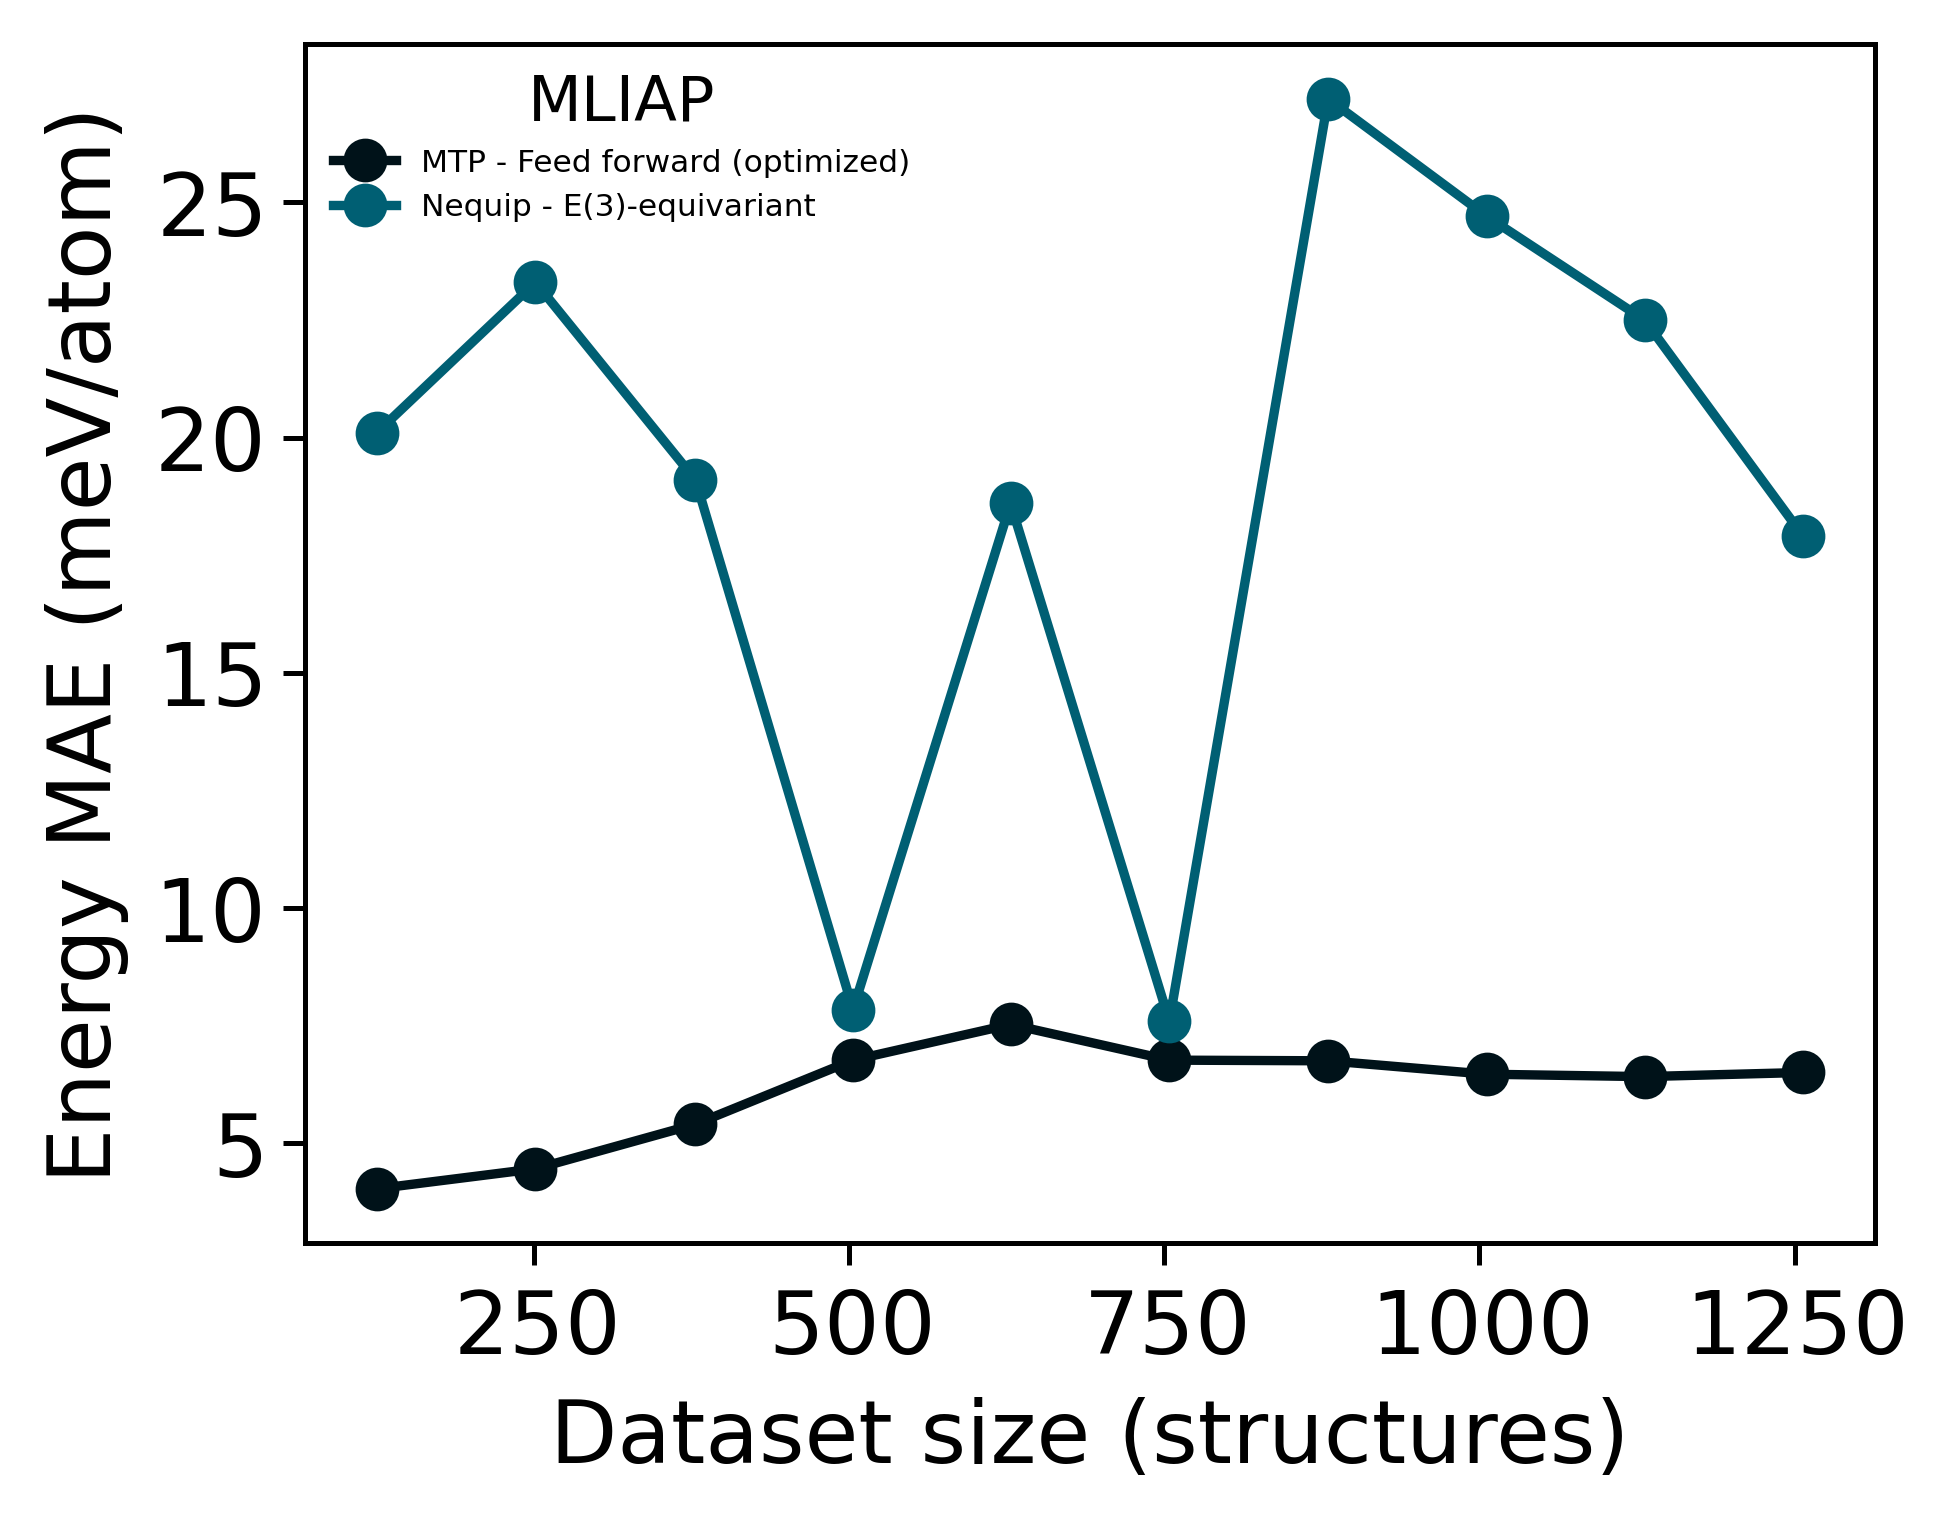

In [14]:
fig,ax = plt.subplots()

x = [125,251,378,503,628,754,880,1006,1131,1257]
y = np.array([0.00403113, 0.00445634, 0.0054036, 0.00676608, 0.00752462, 0.00676533, 0.00675098, 0.00646613, 0.00641488, 0.00650355])*1000
y2 = np.array([0.0201, 0.0233, 0.0191, 0.00784, 0.0186, 0.00759, 0.0272, 0.0247, 0.0225, 0.0179])*1000

# ax.plot(x,y4,label = 'SNAP - Feed forward')
# ax.plot(x,y3,label = 'Schnet - GCNN')
ax.plot(x,y,label = 'MTP - Feed forward (optimized)')
ax.plot(x,y2,label = 'Nequip - E(3)-equivariant')

ax.set_xlabel('Dataset size (structures)')
ax.set_ylabel('Energy MAE (meV/atom)')
ax.legend(title='MLIAP', fontsize=5, loc='upper left')
plt.rcParams['legend.title_fontsize'] = 10
fig.savefig('figs/data_efficiency_schematic.pdf')

## Disclaimer

This data is not to be trusted and is just there as a rough metric to compare. For data extraction, we used the default energy MAE values from the full.yaml config file (nequip) and the standard training output files (MTP). Note that the hyper-parameters implemented for MTPs are already optimized during our previous researches and uses a complex architecture with lots of parameters, whereas ,due to the limit of time, we did not perform hyper-parameter optimization for the nequip potential nor did we get the change to compare the number of parameters used in nequip or implement a nequip potential with more complex structures. But the fact that a very rough model of equivariant nequip potential can obtian similar levels of energy errors with respect to a well-estabilished potential is very exciting.

## References

1. Shapeev, Alexander V. "Moment tensor potentials: A class of systematically improvable interatomic potentials." Multiscale Modeling & Simulation 14.3 (2016): 1153-1173.
2. Batzner, Simon, et al. "E (3)-equivariant graph neural networks for data-efficient and accurate interatomic potentials." Nature communications 13.1 (2022): 1-11.